In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/COMPLAINTS_RECEIVED_2020-2024.txt', sep='\t')
df.columns = [
    'CMPLID', 'ODINO', 'MFR_NAME', 'MAKETXT', 'MODELTXT', 'YEARTXT', 'CRASH', 'FAILDATE', 'FIRE', 'INJURED', 'DEATHS',
    'COMPDESC', 'CITY', 'STATE', 'VIN', 'DATEA', 'LDATE', 'MILES', 'OCCURENCES', 'CDESCR', 'CMPL_TYPE', 'POLICE_RPT_YN',
    'PURCH_DT', 'ORIG_OWNER_YN', 'ANTI_BRAKES_YN', 'CRUISE_CONT_YN', 'NUM_CYLS', 'DRIVE_TRAIN', 'FUEL_SYS', 'FUEL_TYPE',
    'TRANS_TYPE', 'VEH_SPEED', 'DOT', 'TIRE_SIZE', 'LOC_OF_TIRE', 'TIRE_FAIL_TYPE', 'ORIG_EQUIP_YN', 'MANUF_DT',
    'SEAT_TYPE', 'RESTRAINT_TYPE', 'DEALER_NAME', 'DEALER_TEL', 'DEALER_CITY', 'DEALER_STATE', 'DEALER_ZIP',
    'PROD_TYPE', 'REPAIRED_YN', 'MEDICAL_ATTN', 'VEHICLES_TOWED_YN'
]
# Extract year from the LDATE numeric column
df['year'] = df['LDATE'].astype(str).str[:4].astype(int)
df.head()

/tmp/ipykernel_68662/915682400.py:1: DtypeWarning: Columns (27,28,29,30,33,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/COMPLAINTS_RECEIVED_2020-2024.txt', sep='\t')


,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,...,DEALER_NAME,DEALER_TEL,DEALER_CITY,DEALER_STATE,DEALER_ZIP,PROD_TYPE,REPAIRED_YN,MEDICAL_ATTN,VEHICLES_TOWED_YN,year
0,1633359,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N,2020
1,1633360,11292384,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,20191221,N,0,...,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N,2020
2,1633361,11292385,Ford Motor Company,FORD,EXPLORER,2020.0,N,20191226,N,0,...,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N,2020
3,1633362,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N,2020
4,1633363,11292386,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,20190712,N,0,...,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N,2020


In [3]:
#list distinct years
distinct_years = df['year'].unique()
print("Distinct years in the dataset:", distinct_years)

Distinct years in the dataset: [2020 2021 2022 2023 2024]


In [4]:
df.describe()

,CMPLID,ODINO,YEARTXT,FAILDATE,INJURED,DEATHS,DATEA,LDATE,MILES,OCCURENCES,PURCH_DT,NUM_CYLS,VEH_SPEED,MANUF_DT,year
count,4.183950e+05,4.183950e+05,418388.000000,4.183950e+05,418395.000000,418395.000000,4.183950e+05,4.183950e+05,1.500360e+05,14100.000000,2.553000e+03,26760.000000,238814.000000,5.860000e+02,418395.000000
mean,1.842580e+06,1.147910e+07,2124.374318,2.021828e+07,0.038750,0.003365,2.022189e+07,2.022189e+07,7.690908e+04,1.137943,2.018026e+07,5.305717,33.881175,2.020870e+07,2022.123209
std,1.208091e+05,9.568995e+04,923.741048,2.056645e+04,0.448089,0.426837,1.450544e+04,1.450544e+04,1.087632e+05,0.771537,4.271204e+04,1.464402,31.169203,1.988640e+04,1.449587
min,1.633359e+06,5.657130e+05,1960.000000,1.917010e+07,0.000000,0.000000,2.020010e+07,2.020010e+07,0.000000e+00,0.000000,1.984061e+07,0.000000,0.000000,2.014052e+07,2020.000000
25%,1.737958e+06,1.140596e+07,2013.000000,2.020122e+07,0.000000,0.000000,2.021040e+07,2.021040e+07,2.700000e+04,1.000000,2.016090e+07,4.000000,5.000000,2.020025e+07,2021.000000
50%,1.842556e+06,1.148588e+07,2017.000000,2.022062e+07,0.000000,0.000000,2.022092e+07,2.022092e+07,6.800000e+04,1.000000,2.019051e+07,6.000000,35.000000,2.021091e+07,2022.000000
75%,1.947232e+06,1.155820e+07,2019.000000,2.023091e+07,0.000000,0.000000,2.023120e+07,2.023120e+07,1.100000e+05,1.000000,2.021010e+07,6.000000,55.000000,2.022102e+07,2023.000000
max,2.051831e+06,1.163347e+07,9999.000000,2.024123e+07,99.000000,99.000000,2.024123e+07,2.024123e+07,9.848609e+06,40.000000,2.024093e+07,16.000000,999.000000,2.024081e+07,2024.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418395 entries, 0 to 418394
Data columns (total 50 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLID             418395 non-null  int64  
 1   ODINO              418395 non-null  int64  
 2   MFR_NAME           418388 non-null  object 
 3   MAKETXT            418388 non-null  object 
 4   MODELTXT           418388 non-null  object 
 5   YEARTXT            418388 non-null  float64
 6   CRASH              418395 non-null  object 
 7   FAILDATE           418395 non-null  int64  
 8   FIRE               418395 non-null  object 
 9   INJURED            418395 non-null  int64  
 10  DEATHS             418395 non-null  int64  
 11  COMPDESC           418393 non-null  object 
 12  CITY               418378 non-null  object 
 13  STATE              418395 non-null  object 
 14  VIN                409186 non-null  object 
 15  DATEA              418395 non-null  int64  
 16  LD

In [5]:
#count  number of rows in df dataframe that has either DEATHS or INJURED = 99
count = df[(df['DEATHS'] == 99) | (df['INJURED'] == 99)].shape[0]
print(f"Number of rows with DEATHS or INJURED = 99: {count}")

Number of rows with DEATHS or INJURED = 99: 7


In [7]:
# delete rows with DEATHS or INJURED = 99
df = df[(df['DEATHS'] != 99) & (df['INJURED'] != 99)]
# count number of rows in df dataframe that has either DEATHS or INJURED = 99 after deletion
count_after_deletion = df[(df['DEATHS'] == 99) | (df['INJURED'] == 99)].shape[0]
print(f"Number of rows with DEATHS or INJURED = 99 after deletion: {count_after_deletion}")

Number of rows with DEATHS or INJURED = 99 after deletion: 0


In [5]:
#Call OLLAMA API with qwen2.5:7b model to check for each CPCDESCR. You will createa prompt that starts with "You are helpful assistent. Your job is to read this statement & answer YDeath reported or Death not reported. \
#  You will say Death reported if the statement mentions about death. No need for explanation - " and append with CPCDESCR. You will call for each row in the df and store the result in a new column called 'Death Reported' in the df dataframe. \
# DEATHCNFR
# will be the column name in the df dataframe that will have the result of the OLLAMA API call.
import ollama
def call_ollama_api(comdesc):

    prompt = f"You are a accident report analyst. Your job is to review the compliant description to identify if there was any fatality. You will provide the response as either Death Reported or Death Not Reported. You will analyze the text step by step, think, review your answer before you respond. You will not share your thinking process as part of your response but only the outcome of your analyiss that is Death Reported or Death Not Reported - {comdesc}"
    try:
        response = ollama.chat(
            model="qwen2.5:7b",
            messages=[{
                'role': 'user',
                'content': prompt,
            }],
            stream=False
        )
        print("Response from OLLAMA API:", response['message']['content'])
        return response['message']['content']
    except Exception as e:
        print("Error calling OLLAMA API:", e)
        return f"Error: {e}"
    
# Apply the function to each row in the COMPDESC column and store the result in a new column called 'Death Reported'
import concurrent.futures

def apply_ollama_multithreaded(df, func, column, new_column, max_workers=50):
    mask = df['DEATHS'] > 0
    df_subset = df[mask].copy()
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = list(executor.map(func, df_subset[column]))
    df.loc[mask, new_column] = results

apply_ollama_multithreaded(df, call_ollama_api, 'CDESCR', 'Death Reported', max_workers=15)
# Save the updated dataframe with the 'Death Reported' column to a new CSV file
df.to_csv('data/cleaned_data_with_death_reported.csv', index=False)
# Display the first few rows of the updated dataframe

Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Not Reported
Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Reported

The compliant description indicates that the contact's wife passed away 40 days after the accident due to injuries sustained from hitting the dashboard with her head and seatbelt-related complications, specifically septic shock. Therefore, there was a fatality reported in this incident.
Response from OLLAMA API: Death Not Reported

The provided description does not mention any fatality. It describes an accident where the individual was injured with a fractured sternum and ribs, but no death is reported or implied.
Response from OLLAMA API: Death Reported
Response from OLLAMA API: Death Reported
Response from OLLAMA API

In [ ]:
# The Death Reported column will have the result of the OLLAMA API call
# But in some cases, the value may contaain more than "Death Reported" or "Death Not Reported".
# So we will clean the column to have only "Death Reported" or "Death Not Reported" as the value.
def clean_death_reported_column(df, column):
    # The condition is to check if the value is starting with "Death Reported" or "Death Not Reported" and replace it with the respective value.
    # Apply this only for rows with DEATHS > 0
    mask = df['DEATHS'] > 0
    df_subset = df[mask].copy()
    df_subset[column] = df_subset[column].apply(lambda x: "Death Reported" if x.startswith("Death Reported") else ("Death Not Reported" if x.startswith("Death Not Reported") else x))
    df.loc[mask, column] = df_subset[column]
    return df
# Now apply the function to clean the Death Reported column
df = clean_death_reported_column(df, 'Death Reported')
# Save the updated dataframe with the 'Death Reported' column to a new CSV file
df.to_csv('data/cleaned_data_with_death_reported.csv', index=False)

In [9]:
# Whereever the Death Reported column has value as "Death Not Reported", we will set the DEATHS column to 0.
# When we set the DEATHS column to 0, we will also set the INJURED column to 1
def update_deaths_and_injured(df, death_reported_column):
    mask = df[death_reported_column] == "Death Not Reported"
    df.loc[mask, 'DEATHS'] = 0
    # Set INJURED to 1 for these rows only if INJURED is already 0 or NaN
    df.loc[mask, 'INJURED'] = df.loc[mask, 'INJURED'].fillna(0).replace(0, 1)
    return df
# Now apply the function to update the DEATHS and INJURED columns
df = update_deaths_and_injured(df, 'Death Reported')
# Save the updated dataframe with the 'Death Reported' column to a new CSV file
df.to_csv('data/cleaned_data_with_death_reported.csv', index=False)

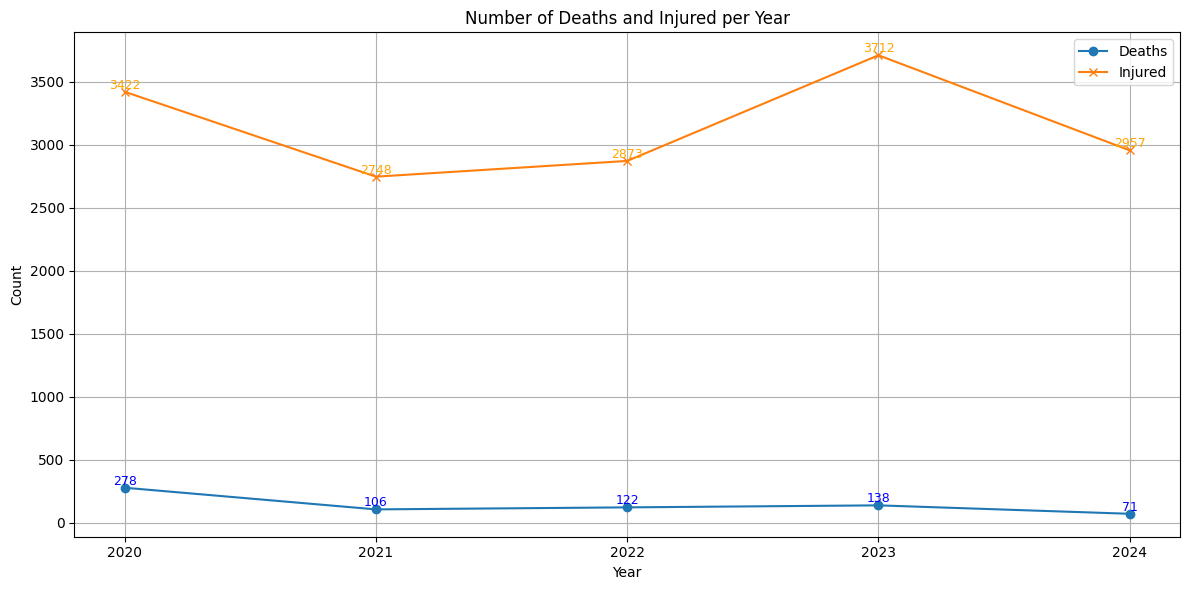

In [8]:
# Create a timeseries from df dataframe for number of DEATHS and INJURED per year
# Ensure to add data lables for both the line graphs

def plot_timeseries(df):
    # Group by year and sum the DEATHS and INJURED columns
    timeseries = df.groupby('year')[['DEATHS', 'INJURED']].sum().reset_index()
    
    # Plotting the timeseries
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries['year'], timeseries['DEATHS'], marker='o', label='Deaths')
    plt.plot(timeseries['year'], timeseries['INJURED'], marker='x', label='Injured')
    
    # Add data labels for Deaths
    for x, y in zip(timeseries['year'], timeseries['DEATHS']):
        plt.text(x, y, str(y), color='blue', fontsize=9, ha='center', va='bottom')
    # Add data labels for Injured
    for x, y in zip(timeseries['year'], timeseries['INJURED']):
        plt.text(x, y, str(y), color='orange', fontsize=9, ha='center', va='bottom')
    
    plt.title('Number of Deaths and Injured per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(timeseries['year'])
    plt.legend()
    plt.grid()
    plt.tight_layout()
    
    # Show the plot
    plt.show()
# Call the function to plot the timeseries
plot_timeseries(df)

In [ ]:
# Example usage:
analysis('DEATHS_unique', 'DEATHS')
analysis('INJURED_unique', 'INJURED')
analysis('DEATHS_unique', 'DEATHS','MAKETXT')
analysis('INJURED_unique', 'INJURED','MAKETXT')
analysis('DEATHS_unique', 'DEATHS','MODELTXT')
analysis('INJURED_unique', 'INJURED','MODELTXT')

In [ ]:
# Create a new DEATHS and INJURED column which will have value only once per VIN.
# If there are multiple rows for the same VIN, we will take the maximum value of DEATHS and INJURED columns.
# We will not drop the duplicate rows based on VIN column since thats needed to count the number of occurrences of each VIN.
def add_unique_deaths_injured_columns(df):
    # Assume df has columns: VIN, MFR_NAME, MAKETXT, MODELTXT, FAILDATE, DEATHS, INJURED
    import numpy as np

    # Initialize the unique columns to zero
    df['DEATHS_unique'] = 0
    df['INJURED_unique'] = 0

    # Create a grouping key: use VIN if present, otherwise a combination of MFR_NAME, MAKETXT, MODELTXT & FAILDATE.
    df['_group'] = np.where(
        df['VIN'].notnull() & (df['VIN'] != ''),
        df['VIN'],
        df['MFR_NAME'].astype(str) + "_" + df['MAKETXT'].astype(str) + "_" + df['MODELTXT'].astype(str) + "_" + df['FAILDATE'].astype(str)
    )

    # For each group, select the first occurrence and set the unique values
    first_idx = df.groupby('_group', sort=False).head(1).index
    df.loc[first_idx, 'DEATHS_unique'] = df.loc[first_idx, 'DEATHS']
    df.loc[first_idx, 'INJURED_unique'] = df.loc[first_idx, 'INJURED']
    
    # Remove the temporary grouping column
    df.drop(columns=['_group'], inplace=True)
    return df

df = add_unique_deaths_injured_columns(df) 
# Save the updated dataframe with the unique DEATHS and INJURED columns to a new CSV file
df.to_csv('data/cleaned_data_with_unique_deaths_injured.csv', index=False)
analysis('DEATHS_unique', 'DEATHS')
analysis('INJURED_unique', 'INJURED')


In [11]:
# count number of rows in df dataframe that has either DEATHS or INJURED > 0 and has POLICE_RPT_YN = N
count_police_report_no = df[(df['DEATHS'] > 0) | (df['INJURED'] > 0) & (df['POLICE_RPT_YN'] == 'N')].shape[0]
print(f"Number of rows with DEATHS or INJURED > 0 and POLICE_RPT_YN = N: {count_police_report_no}")
# print in table format where rows are YEARS and columns are number of DEATHS, NUMBER of INJURED with POLICE_RPT_YN = N & Y
df_pivot = df.pivot_table(index='year', columns='POLICE_RPT_YN', values=['DEATHS', 'INJURED'], aggfunc='sum')
print(df_pivot)

Number of rows with DEATHS or INJURED > 0 and POLICE_RPT_YN = N: 5202
              DEATHS     INJURED      
POLICE_RPT_YN      N   Y       N     Y
year                                  
2020               8  83    1199  2230
2021              10  52    1011  1742
2022              21  65    1085  1791
2023              11  74    1509  2211
2024               7  46    1311  1656


In [11]:
df_cleaned.to_csv('data/cleaned_data_with_unique_deaths_injured.csv', index=False)

In [10]:
# load data from data/cleaned_data_with_death_reported.csv
df_cleaned = pd.read_csv('data/cleaned_data_with_unique_deaths_injured.csv')
# Create a new COMPDESC column that has major and minor categories separated by a colon.
def add_major_component_column(df):
    # Split the COMPDESC column by ':' and take the first part as the major component
    df['COMPDESC_MAJOR'] = df['COMPDESC'].str.split(':').str[0]
    return df
# Add the major component column to the dataframe
df_cleaned = add_major_component_column(df_cleaned)

/tmp/ipykernel_58779/3544079089.py:2: DtypeWarning: Columns (27,28,29,30,33,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('data/cleaned_data_with_unique_deaths_injured.csv')


In [9]:
df_cleaned.columns

Index(['CMPLID', 'ODINO', 'MFR_NAME', 'MAKETXT', 'MODELTXT', 'YEARTXT',
       'CRASH', 'FAILDATE', 'FIRE', 'INJURED', 'DEATHS', 'COMPDESC', 'CITY',
       'STATE', 'VIN', 'DATEA', 'LDATE', 'MILES', 'OCCURENCES', 'CDESCR',
       'CMPL_TYPE', 'POLICE_RPT_YN', 'PURCH_DT', 'ORIG_OWNER_YN',
       'ANTI_BRAKES_YN', 'CRUISE_CONT_YN', 'NUM_CYLS', 'DRIVE_TRAIN',
       'FUEL_SYS', 'FUEL_TYPE', 'TRANS_TYPE', 'VEH_SPEED', 'DOT', 'TIRE_SIZE',
       'LOC_OF_TIRE', 'TIRE_FAIL_TYPE', 'ORIG_EQUIP_YN', 'MANUF_DT',
       'SEAT_TYPE', 'RESTRAINT_TYPE', 'DEALER_NAME', 'DEALER_TEL',
       'DEALER_CITY', 'DEALER_STATE', 'DEALER_ZIP', 'PROD_TYPE', 'REPAIRED_YN',
       'MEDICAL_ATTN', 'VEHICLES_TOWED_YN', 'year', 'DEATHS_unique',
       'INJURED_unique', 'COMPDESC_MAJOR'],
      dtype='object')

ALL DATA IS CLEANED UPTO THIS POINT. LOAD STORED CLEAN DATA & ANALLYZE

In [12]:
# load data from data/cleaned_data_with_death_reported.csv
df_cleaned = pd.read_csv('data/cleaned_data_with_unique_deaths_injured.csv')

/tmp/ipykernel_58779/201710758.py:2: DtypeWarning: Columns (27,28,29,30,33,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('data/cleaned_data_with_unique_deaths_injured.csv')


In [13]:
df_cleaned.columns

Index(['CMPLID', 'ODINO', 'MFR_NAME', 'MAKETXT', 'MODELTXT', 'YEARTXT',
       'CRASH', 'FAILDATE', 'FIRE', 'INJURED', 'DEATHS', 'COMPDESC', 'CITY',
       'STATE', 'VIN', 'DATEA', 'LDATE', 'MILES', 'OCCURENCES', 'CDESCR',
       'CMPL_TYPE', 'POLICE_RPT_YN', 'PURCH_DT', 'ORIG_OWNER_YN',
       'ANTI_BRAKES_YN', 'CRUISE_CONT_YN', 'NUM_CYLS', 'DRIVE_TRAIN',
       'FUEL_SYS', 'FUEL_TYPE', 'TRANS_TYPE', 'VEH_SPEED', 'DOT', 'TIRE_SIZE',
       'LOC_OF_TIRE', 'TIRE_FAIL_TYPE', 'ORIG_EQUIP_YN', 'MANUF_DT',
       'SEAT_TYPE', 'RESTRAINT_TYPE', 'DEALER_NAME', 'DEALER_TEL',
       'DEALER_CITY', 'DEALER_STATE', 'DEALER_ZIP', 'PROD_TYPE', 'REPAIRED_YN',
       'MEDICAL_ATTN', 'VEHICLES_TOWED_YN', 'year', 'DEATHS_unique',
       'INJURED_unique', 'COMPDESC_MAJOR'],
      dtype='object')

In [3]:
df_cleaned.describe()

,CMPLID,ODINO,YEARTXT,FAILDATE,INJURED,DEATHS,DATEA,LDATE,MILES,OCCURENCES,PURCH_DT,NUM_CYLS,VEH_SPEED,MANUF_DT,year,DEATHS_unique,INJURED_unique
count,4.183880e+05,4.183880e+05,418381.000000,4.183880e+05,418388.000000,418388.000000,4.183880e+05,4.183880e+05,1.500360e+05,14100.000000,2.553000e+03,26759.000000,238810.000000,5.860000e+02,418388.000000,418388.000000,418388.000000
mean,1.842579e+06,1.147910e+07,2124.337962,2.021828e+07,0.037554,0.001709,2.022189e+07,2.022189e+07,7.690908e+04,1.137943,2.018026e+07,5.305617,33.869130,2.020870e+07,2022.123192,0.000590,0.013167
std,1.208097e+05,9.569043e+04,923.588238,2.056654e+04,0.289322,0.134988,1.450550e+04,1.450550e+04,1.087632e+05,0.771537,4.271204e+04,1.464336,30.981165,1.988640e+04,1.449593,0.079116,0.196862
min,1.633359e+06,5.657130e+05,1960.000000,1.917010e+07,0.000000,0.000000,2.020010e+07,2.020010e+07,0.000000e+00,0.000000,1.984061e+07,0.000000,0.000000,2.014052e+07,2020.000000,0.000000,0.000000
25%,1.737956e+06,1.140596e+07,2013.000000,2.020122e+07,0.000000,0.000000,2.021040e+07,2.021040e+07,2.700000e+04,1.000000,2.016090e+07,4.000000,5.000000,2.020025e+07,2021.000000,0.000000,0.000000
50%,1.842552e+06,1.148588e+07,2017.000000,2.022062e+07,0.000000,0.000000,2.022092e+07,2.022092e+07,6.800000e+04,1.000000,2.019051e+07,6.000000,35.000000,2.021091e+07,2022.000000,0.000000,0.000000
75%,1.947231e+06,1.155820e+07,2019.000000,2.023091e+07,0.000000,0.000000,2.023120e+07,2.023120e+07,1.100000e+05,1.000000,2.021010e+07,6.000000,55.000000,2.022102e+07,2023.000000,0.000000,0.000000
max,2.051831e+06,1.163347e+07,9999.000000,2.024123e+07,60.000000,45.000000,2.024123e+07,2.024123e+07,9.848609e+06,40.000000,2.024093e+07,16.000000,999.000000,2.024081e+07,2024.000000,45.000000,60.000000


In [14]:
def analysis(df,line_column='DEATHS', bar_column='DEATHS', group_column='COMPDESC', top_n=5):
    # Group the data by year and sum the selected columns
    values_over_years = df.groupby('year')[line_column].sum()
    # Get the top N groups with the most bar_column values
    top_groups = df.groupby(group_column)[bar_column].sum().nlargest(top_n)

    plt.figure(figsize=(12, 6))

    # Line graph for line_column over the years
    plt.plot(values_over_years.index, values_over_years.values, marker='o', label=f'Total {line_column.title()}', color='blue')
    for x, y in zip(values_over_years.index, values_over_years.values):
        plt.text(x, y, str(y), color='blue', fontsize=9, ha='center', va='bottom')

    # Overlay bar graphs for top N groups (using bar_column)
    bar_width = 0.15
    for i, (group, val) in enumerate(top_groups.items()):
        group_vals_by_year = df[df[group_column] == group].groupby('year')[bar_column].sum().reindex(values_over_years.index, fill_value=0)
        plt.bar(
            values_over_years.index + i * bar_width - bar_width,
            group_vals_by_year.values,
            width=bar_width,
            label=f"{group} ({bar_column})"
        )
        for x, y in zip(values_over_years.index + i * bar_width - bar_width, group_vals_by_year.values):
            if y > 0:
                plt.text(x, y, str(y), color='black', fontsize=8, ha='center', va='bottom')

    plt.title(f'{line_column.title()} Over the Years with Top {top_n} {group_column} ({bar_column})')
    plt.xlabel('Year')
    plt.ylabel(f'Number of {line_column.title()} / {bar_column.title()}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(values_over_years.index)
    plt.tight_layout()
    plt.show()



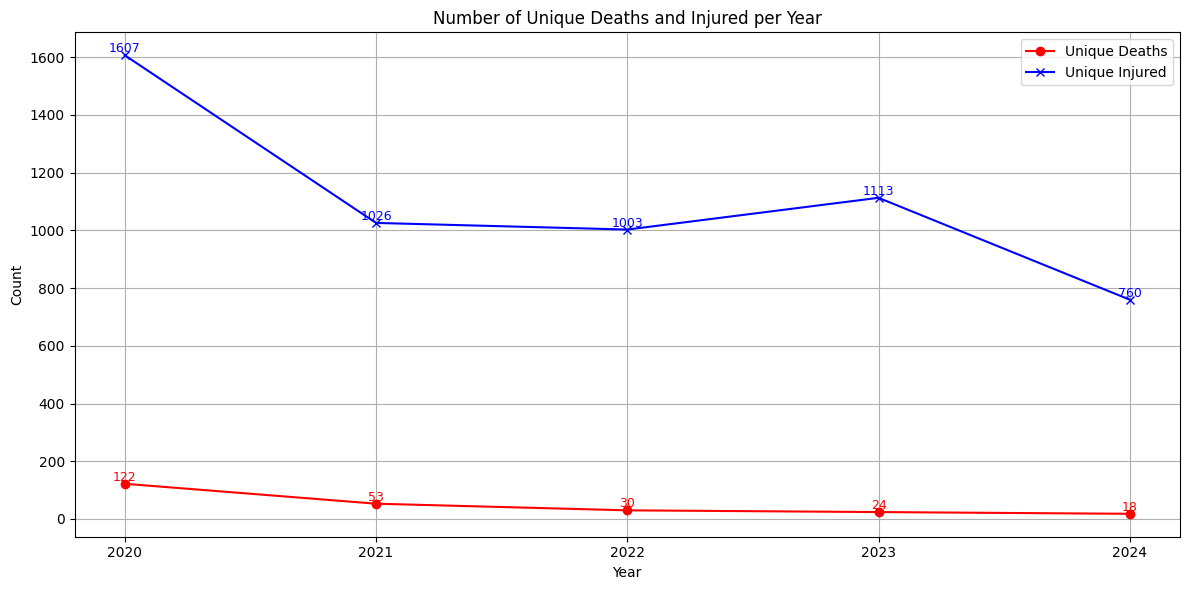

In [21]:
def plot_timeseries(df):
    # Group by year and sum the DEATHS and INJURED columns
    timeseries = df.groupby('year')[['DEATHS_unique', 'INJURED_unique']].sum().reset_index()

    # Plotting the timeseries
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries['year'], timeseries['DEATHS_unique'], marker='o', label='Unique Deaths', color='red')
    plt.plot(timeseries['year'], timeseries['INJURED_unique'], marker='x', label='Unique Injured', color='blue')

    # Add data labels for Unique Deaths
    for x, y in zip(timeseries['year'], timeseries['DEATHS_unique']):
        plt.text(x, y, str(y), color='red', fontsize=9, ha='center', va='bottom')
    # Add data labels for Unique Injured
    for x, y in zip(timeseries['year'], timeseries['INJURED_unique']):
        plt.text(x, y, str(y), color='blue', fontsize=9, ha='center', va='bottom')

    plt.title('Number of Unique Deaths and Injured per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(timeseries['year'])
    plt.legend()
    plt.grid()
    plt.tight_layout()
    
    # Show the plot
    plt.show()
# Call the function to plot the timeseries
plot_timeseries(df_cleaned)

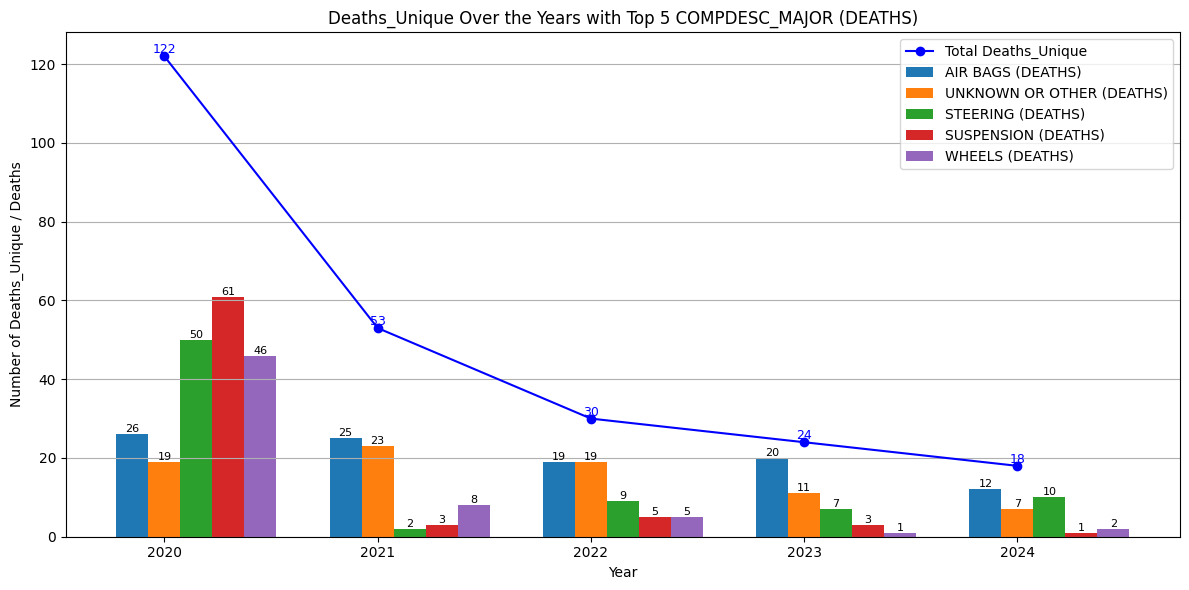

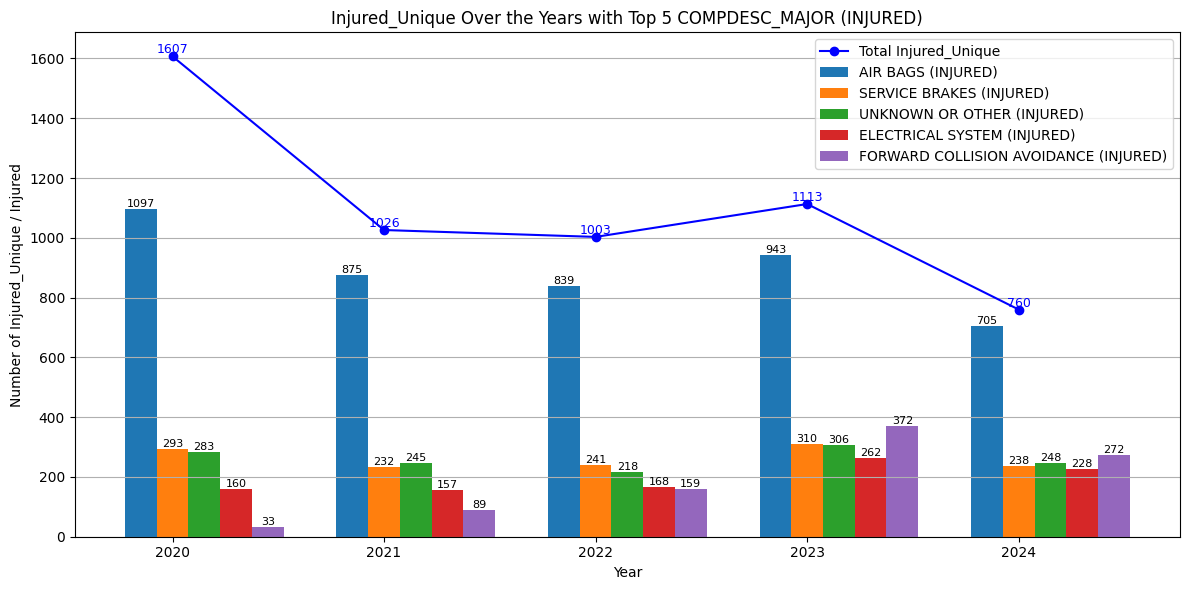

In [15]:
analysis(df_cleaned,'DEATHS_unique', 'DEATHS','COMPDESC_MAJOR')
analysis(df_cleaned,'INJURED_unique', 'INJURED','COMPDESC_MAJOR')

In [5]:
df_cleaned_injured = df_cleaned[df_cleaned['INJURED'] > 0]
df_cleaned_injured.describe()

,CMPLID,ODINO,YEARTXT,FAILDATE,INJURED,DEATHS,DATEA,LDATE,MILES,OCCURENCES,PURCH_DT,NUM_CYLS,VEH_SPEED,MANUF_DT,year,DEATHS_unique,INJURED_unique
count,1.144300e+04,1.144300e+04,11443.000000,1.144300e+04,11443.000000,11443.000000,1.144300e+04,1.144300e+04,5.061000e+03,729.000000,1.470000e+02,1289.000000,8547.000000,1.700000e+01,11443.000000,11443.000000,11443.000000
mean,1.830668e+06,1.146920e+07,2108.532640,2.021601e+07,1.375950,0.016691,2.022047e+07,2.022047e+07,7.620674e+04,1.104252,2.017768e+07,5.166020,31.617995,2.020220e+07,2021.981211,0.006205,0.482566
std,1.177296e+05,1.376930e+05,855.708763,2.068629e+04,1.105383,0.213962,1.424866e+04,1.424866e+04,8.887364e+04,0.457052,4.104147e+04,1.449585,25.340124,3.243184e+04,1.424342,0.122806,1.091644
min,1.633408e+06,5.657130e+05,1977.000000,1.984110e+07,1.000000,0.000000,2.020010e+07,2.020010e+07,0.000000e+00,1.000000,2.002032e+07,2.000000,0.000000,2.015030e+07,2020.000000,0.000000,0.000000
25%,1.730092e+06,1.139842e+07,2013.000000,2.020110e+07,1.000000,0.000000,2.021030e+07,2.021030e+07,2.000000e+04,1.000000,2.017030e+07,4.000000,5.500000,2.018071e+07,2021.000000,0.000000,0.000000
50%,1.827050e+06,1.147496e+07,2017.000000,2.022032e+07,1.000000,0.000000,2.022072e+07,2.022072e+07,6.000000e+04,1.000000,2.019010e+07,4.000000,30.000000,2.021040e+07,2022.000000,0.000000,0.000000
75%,1.925670e+06,1.154333e+07,2020.000000,2.023070e+07,1.000000,0.000000,2.023091e+07,2.023091e+07,1.140000e+05,1.000000,2.020082e+07,6.000000,50.000000,2.022110e+07,2023.000000,0.000000,1.000000
max,2.051664e+06,1.163336e+07,9999.000000,2.024123e+07,60.000000,10.000000,2.024123e+07,2.024123e+07,2.300000e+06,5.000000,2.024010e+07,12.000000,551.000000,2.024043e+07,2024.000000,10.000000,60.000000


In [6]:
df_cleaned_dead = df_cleaned[df_cleaned['DEATHS'] > 0]
df_cleaned_dead.describe()

,CMPLID,ODINO,YEARTXT,FAILDATE,INJURED,DEATHS,DATEA,LDATE,MILES,OCCURENCES,PURCH_DT,NUM_CYLS,VEH_SPEED,MANUF_DT,year,DEATHS_unique,INJURED_unique
count,2.840000e+02,2.840000e+02,284.000000,2.840000e+02,284.000000,284.000000,2.840000e+02,2.840000e+02,79.000000,38.000000,1.0,55.000000,165.000000,4.0,284.000000,284.000000,284.000000
mean,1.820381e+06,1.146253e+07,2266.940141,2.020944e+07,0.771127,1.327465,2.021987e+07,2.021987e+07,84453.506329,1.026316,20181212.0,5.200000,41.921212,20168003.5,2021.929577,0.433099,0.288732
std,1.126719e+05,8.958177e+04,1401.266343,2.184255e+04,0.998450,1.204447,1.370594e+04,1.370594e+04,139474.943819,0.162221,NaN,1.470702,27.690358,35399.0,1.369263,0.814465,0.688943
min,1.634160e+06,1.129697e+07,1995.000000,2.008021e+07,0.000000,1.000000,2.020010e+07,2.020010e+07,0.000000,1.000000,20181212.0,4.000000,0.000000,20150304.0,2020.000000,0.000000,0.000000
25%,1.724953e+06,1.139405e+07,2010.750000,2.020051e+07,0.000000,1.000000,2.021019e+07,2.021019e+07,3917.000000,1.000000,20181212.0,4.000000,25.000000,20150304.0,2021.000000,0.000000,0.000000
50%,1.817442e+06,1.146815e+07,2015.000000,2.021101e+07,1.000000,1.000000,2.022057e+07,2.022057e+07,50000.000000,1.000000,20181212.0,4.000000,45.000000,20150304.0,2022.000000,0.000000,0.000000
75%,1.910928e+06,1.153320e+07,2020.000000,2.022092e+07,1.000000,1.000000,2.023072e+07,2.023072e+07,99500.000000,1.000000,20181212.0,6.000000,60.000000,20168003.5,2023.000000,1.000000,0.000000
max,2.047861e+06,1.163082e+07,9999.000000,2.024111e+07,5.000000,10.000000,2.024122e+07,2.024122e+07,700000.000000,2.000000,20181212.0,8.000000,118.000000,20221102.0,2024.000000,10.000000,5.000000


In [10]:
# % of rows with INJURED =0
percent_injured_zero = (df_cleaned['INJURED'] == 0).mean() * 100
print(f"Percentage of rows with INJURED = 0: {percent_injured_zero:.2f}%")

# % of rows with DEATHS =0
percent_deaths_zero = (df_cleaned['DEATHS'] == 0).mean() * 100
print(f"Percentage of rows with DEATHS = 0: {percent_deaths_zero:.2f}%")

Percentage of rows with INJURED = 0: 97.26%
Percentage of rows with DEATHS = 0: 99.93%


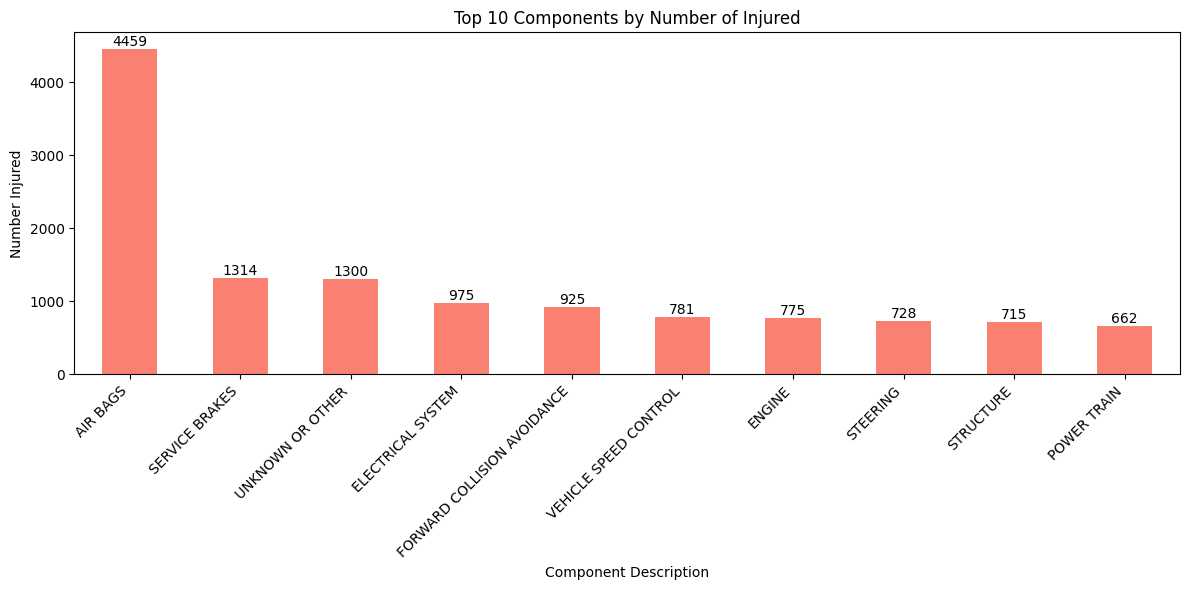

In [42]:
# Create descriptive statistics abouot number of COMPDESC ..these are component names causing injuries or deaths
def component_description_analysis(df, column='COMPDESC', top_n=10):
    # Group by component and sum the INJURED column
    injured_by_component = df.groupby(column)['INJURED'].sum().nlargest(top_n)
    
    # Plotting the top N components by number of injured
    plt.figure(figsize=(12, 6))
    injured_by_component.plot(kind='bar', color='salmon')
    
    # Add data labels on top of each bar
    for i, count in enumerate(injured_by_component):
        plt.text(i, count + 0.5, str(int(count)), ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Top {top_n} Components by Number of Injured')
    plt.xlabel('Component Description')
    plt.ylabel('Number Injured')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Call the function to analyze component descriptions
component_description_analysis(df_cleaned, column='COMPDESC_MAJOR', top_n=10)

In [34]:
from IPython.display import display

# Display the grouped counts in a nice table format using pandas

display(air_bags_grouped)

# Optionally, display each record as a formatted table (showing selected columns)
display(air_bags_df[['INJURED', 'DEATHS', 'COMPDESC']])

print(f"\nTotal number of records starting with COMPDESC 'AIR BAGS': {air_bags_df.shape[0]}")


,COMPDESC,count
0,AIR BAGS,19288
1,AIR BAGS: AIR BAG/RESTRAINT CONTROL MODULE,37
2,AIR BAGS: AIR BAG/RESTRAINT CONTROL MODULE:SOF...,6
3,AIR BAGS:FRONTAL,10
4,AIR BAGS:FRONTAL:DRIVER CLOCKSPRING/SPIRAL CAS...,134
5,AIR BAGS:FRONTAL:DRIVER SIDE:CUSHION,2
6,AIR BAGS:FRONTAL:DRIVER SIDE:INFLATOR MODULE,13
7,AIR BAGS:FRONTAL:PASSENGER SIDE:INFLATOR MODULE,24
8,AIR BAGS:KNEE BOLSTER,3
9,AIR BAGS:PASSENGER SIDE FRONTAL:CUSHION,5


,INJURED,DEATHS,COMPDESC
49,2,0,AIR BAGS
68,1,0,AIR BAGS
74,1,0,AIR BAGS
87,0,0,AIR BAGS
116,3,0,AIR BAGS
...,...,...,...
418225,0,0,AIR BAGS
418240,0,0,AIR BAGS
418359,0,0,AIR BAGS
418384,0,0,AIR BAGS



Total number of records starting with COMPDESC 'AIR BAGS': 19833


In [41]:
# Print number of unique COMPDESC
unique_comdesc_count = df_cleaned['COMPDESC'].nunique()
print(f"Number of unique COMPDESC: {unique_comdesc_count}")

unique_comdesc_count = df_cleaned['COMPDESC_MAJOR'].nunique()
print(f"Number of unique COMPDESC_MAJOR: {unique_comdesc_count}")

# Number of COMPDESC starting with 'AIR BAGS'
# Group by COMPDESC values that start with 'AIR BAGS' and count occurrences
air_bags_grouped = (
    df_cleaned[df_cleaned['COMPDESC'].str.startswith('AIR BAGS', na=False)]
    .groupby('COMPDESC')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)
print(air_bags_grouped)
print(f"Number of COMPDESC starting with 'AIR BAGS': {air_bags_count}")

Number of unique COMPDESC: 679
Number of unique COMPDESC_MAJOR: 50
                                             COMPDESC  count
0                                            AIR BAGS  19288
4   AIR BAGS:FRONTAL:DRIVER CLOCKSPRING/SPIRAL CAS...    134
11            AIR BAGS:SENSOR:OCCUPANT CLASSIFICATION    120
13  AIR BAGS:SENSOR:OCCUPANT CLASSIFICATION:FRONT ...     98
22        AIR BAGS:SRS MALFUNCTION WARNING LAMP/LIGHT     53
1          AIR BAGS: AIR BAG/RESTRAINT CONTROL MODULE     37
7     AIR BAGS:FRONTAL:PASSENGER SIDE:INFLATOR MODULE     24
6        AIR BAGS:FRONTAL:DRIVER SIDE:INFLATOR MODULE     13
15  AIR BAGS:SENSOR:OCCUPANT CLASSIFICATION:STATUS...     12
17                       AIR BAGS:SIDE/WINDOW:CURTAIN     11
3                                    AIR BAGS:FRONTAL     10
2   AIR BAGS: AIR BAG/RESTRAINT CONTROL MODULE:SOF...      6
16                               AIR BAGS:SIDE/WINDOW      6
9             AIR BAGS:PASSENGER SIDE FRONTAL:CUSHION      5
8                 